This notebook is a study of the 'Single Link'

We start with the 'Euclidean Distance' in 2D. In math, is the minimum distance between two point in straight line: D = sqrt((Xb-Xa)^2 + (Yb-Yb)^2)

In [92]:
import math

a = [0.35,0.32]
b = [0.26,0.19]

distance = math.dist(a,b)
distance

0.15811388300841894

Now, we gonna make a dataset with randows numbers in pandas.

In [93]:
import pandas as pd

A = [7,83]
B = [85,14]
C = [66,89]
D = [49,64]
E = [80,46]

data = [A,B,C,D,E]
lines = ['P1','P2','P3','P4','P5']

dataset = pd.DataFrame(data,columns=['X','Y'],index=lines)
dataset


,X,Y
P1,7,83
P2,85,14
P3,66,89
P4,49,64
P5,80,46


The next step is calculate the distance between each point. The Distance Matrix.

In [97]:
from scipy.spatial import distance_matrix

matrix_distance = pd.DataFrame(distance_matrix(dataset.values,dataset.values),index=dataset.index,columns=dataset.index)
for i in range(len(lines)):
    for j in range(i,len(lines)):
        matrix_distance.at[lines[i],lines[j]] = 0

matrix_distance = matrix_distance.round(0)
matrix_distance

,P1,P2,P3,P4,P5
P1,0.0,0.0,0.0,0.0,0.0
P2,104.0,0.0,0.0,0.0,0.0
P3,59.0,77.0,0.0,0.0,0.0
P4,46.0,62.0,30.0,0.0,0.0
P5,82.0,32.0,45.0,36.0,0.0


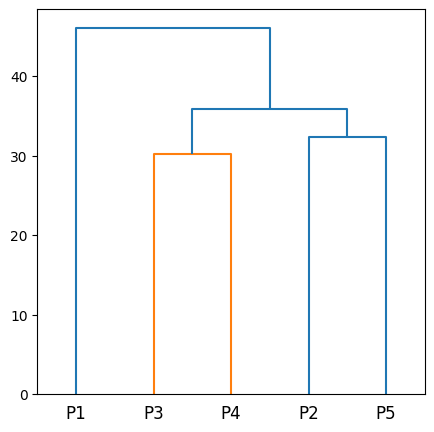

In [96]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
import numpy as np

single_link = shc.linkage(dataset[['X','Y']])
fig = plt.figure(figsize=(5, 5))
dn = shc.dendrogram(single_link,labels=lines)
plt.show()